<a href="https://colab.research.google.com/github/xahram/catch_the_pink_flamingo/blob/main/assessment_bigdata.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
from google.colab import files
uploaded = files.upload()


import sys, os

sys.path
sys.executable





'/usr/bin/python3'

In [6]:
!apt-get install openjdk-8-jdk-headless

Reading package lists... Done
Building dependency tree       
Reading state information... Done
openjdk-8-jdk-headless is already the newest version (8u312-b07-0ubuntu1~18.04).
The following packages were automatically installed and are no longer required:
  libnvidia-common-460 nsight-compute-2020.2.0
Use 'apt autoremove' to remove them.
0 upgraded, 0 newly installed, 0 to remove and 42 not upgraded.


In [7]:
!wget https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz

--2022-05-08 08:55:12--  https://archive.apache.org/dist/spark/spark-3.2.1/spark-3.2.1-bin-hadoop2.7.tgz
Resolving archive.apache.org (archive.apache.org)... 138.201.131.134, 2a01:4f8:172:2ec5::2
Connecting to archive.apache.org (archive.apache.org)|138.201.131.134|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 272637746 (260M) [application/x-gzip]
Saving to: ‘spark-3.2.1-bin-hadoop2.7.tgz’

spark-3.2.1-bin-had 100%[===================>] 260.01M  28.2MB/s    in 10s     

2022-05-08 08:55:22 (26.0 MB/s) - ‘spark-3.2.1-bin-hadoop2.7.tgz’ saved [272637746/272637746]



In [8]:
!tar xf /content/spark-3.2.1-bin-hadoop2.7.tgz

In [9]:
!pip install -q findspark
!pip install pyspark

In [10]:
import os

os.environ["JAVA_HOME"] =  "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = "/content/spark-3.2.1-bin-hadoop2.7"


import findspark

findspark.init()
findspark.find()


'/content/spark-3.2.1-bin-hadoop2.7'

In [11]:
import pyspark


sc = pyspark.SparkContext(master="local[*]", appName="FirstExample")




In [12]:
sc.setLogLevel("ERROR")

In [13]:
from pyspark.sql import SparkSession

spark = SparkSession.builder.master("local").appName("assessment_bigdata").config("spark.ui.port", "4050").getOrCreate()

In [14]:
spark

In [15]:
# UNZIPPING THE DATASET FILES


!unzip "/content/chat-data.zip"
!unzip "/content/combined-data.zip"



Archive:  /content/chat-data.zip
   creating: chat-data/
  inflating: chat-data/chat_join_team_chat.csv  
  inflating: chat-data/chat_leave_team_chat.csv  
  inflating: chat-data/chat_mention_team_chat.csv  
  inflating: chat-data/chat_respond_team_chat.csv  
Archive:  /content/combined-data.zip
  inflating: combined-data.csv       


In [16]:

buy_clicks_df = spark.read.csv("/content/flamingo-data/buy-clicks.csv", header=True, inferSchema=True)

In [17]:
buy_clicks_df.printSchema()

root
 |-- timestamp: string (nullable = true)
 |-- txId: integer (nullable = true)
 |-- userSessionId: integer (nullable = true)
 |-- team: integer (nullable = true)
 |-- userId: integer (nullable = true)
 |-- buyId: integer (nullable = true)
 |-- price: double (nullable = true)



In [18]:
buy_clicks_df.show(5)

+-------------------+----+-------------+----+------+-----+-----+
|          timestamp|txId|userSessionId|team|userId|buyId|price|
+-------------------+----+-------------+----+------+-----+-----+
|2016-05-26 15:36:54|6004|         5820|   9|  1300|    2|  3.0|
|2016-05-26 15:36:54|6005|         5775|  35|   868|    4| 10.0|
|2016-05-26 15:36:54|6006|         5679|  97|   819|    5| 20.0|
|2016-05-26 16:36:54|6067|         5665|  18|   121|    2|  3.0|
|2016-05-26 17:06:54|6093|         5709|  11|  2222|    5| 20.0|
+-------------------+----+-------------+----+------+-----+-----+
only showing top 5 rows



In [19]:
buy_clicks_df.describe().toPandas().transpose()

,0,1,2,3,4
summary,count,mean,stddev,min,max
timestamp,2947,None,None,2016-05-26 15:36:54,2016-06-16 10:36:54
txId,2947,25443.01085850017,9343.543792592367,6004,39842
userSessionId,2947,22884.75229046488,8669.35362676463,5652,39275
team,2947,70.31896844248388,40.27452540199273,2,178
userId,2947,1187.4591109602986,685.7038088341923,1,2387
buyId,2947,2.530709195792331,1.7799870722907862,0,5
price,2947,7.263997285374957,7.076313004712134,1.0,20.0


In [20]:
############################### EXPLORATORY DATA ANALYSIS

users_df = spark.read.csv("/content/flamingo-data/users.csv", header=True, inferSchema=True)
team_df = spark.read.csv("/content/flamingo-data/team.csv", header=True, inferSchema=True)
adclicks_df = spark.read.csv("/content/flamingo-data/ad-clicks.csv", header=True, inferSchema=True)
buyclicks_df = spark.read.csv("/content/flamingo-data/buy-clicks.csv", header=True, inferSchema=True)

users_df.show(5)





+-------------------+------+-----------+--------+----------+-------+
|          timestamp|userId|       nick| twitter|       dob|country|
+-------------------+------+-----------+--------+----------+-------+
|2012-06-19 14:53:41|   442|   pcjIOBKW|@SZhyOHv|1994-07-20|     BA|
|2012-06-19 19:29:01|   949|    vAOfUkf|  @nkkNo|1971-04-22|     HU|
|2012-06-20 19:34:59|  1654|     qOOXSQ|  @SwOlw|1970-04-19|     IS|
|2012-06-21 01:18:29|  1586|    px4gW51|@IrCHTnE|1965-11-23|     AM|
|2012-06-21 15:35:00|   599|9gkfwRC73Uc| @VJj0Az|1994-08-23|     CC|
+-------------------+------+-----------+--------+----------+-------+
only showing top 5 rows



In [21]:
###### CONVERT DOB TO AGE

from pyspark.sql import functions as f



# Resource for below Code : https://stackoverflow.com/questions/62148704/date-difference-in-years-in-pyspark-dataframe

users_with_age_df = users_df.withColumn("age",   (f.months_between(f.current_date(), f.col('dob')) / 12).cast('int'))

users_with_age_df.show(5)



+-------------------+------+-----------+--------+----------+-------+---+
|          timestamp|userId|       nick| twitter|       dob|country|age|
+-------------------+------+-----------+--------+----------+-------+---+
|2012-06-19 14:53:41|   442|   pcjIOBKW|@SZhyOHv|1994-07-20|     BA| 27|
|2012-06-19 19:29:01|   949|    vAOfUkf|  @nkkNo|1971-04-22|     HU| 51|
|2012-06-20 19:34:59|  1654|     qOOXSQ|  @SwOlw|1970-04-19|     IS| 52|
|2012-06-21 01:18:29|  1586|    px4gW51|@IrCHTnE|1965-11-23|     AM| 56|
|2012-06-21 15:35:00|   599|9gkfwRC73Uc| @VJj0Az|1994-08-23|     CC| 27|
+-------------------+------+-----------+--------+----------+-------+---+
only showing top 5 rows



In [66]:
# list(users_with_age_df.toPandas()["age"].values)
users_with_age_df.show()

+-------------------+------+-----------+----------+----------+-------+---+
|          timestamp|userId|       nick|   twitter|       dob|country|age|
+-------------------+------+-----------+----------+----------+-------+---+
|2012-06-19 14:53:41|   442|   pcjIOBKW|  @SZhyOHv|1994-07-20|     BA| 27|
|2012-06-19 19:29:01|   949|    vAOfUkf|    @nkkNo|1971-04-22|     HU| 51|
|2012-06-20 19:34:59|  1654|     qOOXSQ|    @SwOlw|1970-04-19|     IS| 52|
|2012-06-21 01:18:29|  1586|    px4gW51|  @IrCHTnE|1965-11-23|     AM| 56|
|2012-06-21 15:35:00|   599|9gkfwRC73Uc|   @VJj0Az|1994-08-23|     CC| 27|
|2012-06-22 11:36:19|   952| BRbb3VOTti|   @b4OK6K|1986-09-11|     MH| 35|
|2012-06-23 08:11:18|  1056|    fGCIAtI| @IgDsdWdU|1991-11-28|     SM| 30|
|2012-06-23 10:54:19|    91|tpDfgi3S0N9|   @LvTHGO|1977-07-03|     BZ| 44|
|2012-06-23 14:59:26|   809| LkNRpRW6Ez|@ROrRkXwdh|1951-09-25|     PF| 70|
|2012-06-23 17:40:35|    75|     fNWewX|   @OXqLyv|1979-11-12|     JO| 42|
|2012-06-23 17:57:05|  22

In [23]:
users_with_age_df.toPandas()[["age"]].describe().transpose()

,count,mean,std,min,25%,50%,75%,max
age,2393.0,45.139156,14.068018,23.0,33.0,43.0,56.0,75.0


In [105]:
from pyspark.sql.functions import udf


age_range = udf(lambda age: '< 20' if age < 20 else 
                       '20-29' if (age >= 20 and age < 30) else
                       '30-39' if (age >= 30 and age < 40) else
                       '40-49' if (age >= 40 and age < 50) else        
                       '50-59' if (age >= 50 and age < 60) else
                       '60-70' if (age >= 60 and age < 70) else
                       '70-79' if (age >= 70 and age < 79) else
                       '80-100' if (age >= 80 and age < 101)  else ""    
                       )

users_with_age_df = users_with_age_df.withColumn('age_group', age_range(users_with_age_df.age))
users_with_age_df.show()

+-------------------+------+-----------+----------+----------+-------+---+---------+
|          timestamp|userId|       nick|   twitter|       dob|country|age|age_group|
+-------------------+------+-----------+----------+----------+-------+---+---------+
|2012-06-19 14:53:41|   442|   pcjIOBKW|  @SZhyOHv|1994-07-20|     BA| 27|    20-29|
|2012-06-19 19:29:01|   949|    vAOfUkf|    @nkkNo|1971-04-22|     HU| 51|    50-59|
|2012-06-20 19:34:59|  1654|     qOOXSQ|    @SwOlw|1970-04-19|     IS| 52|    50-59|
|2012-06-21 01:18:29|  1586|    px4gW51|  @IrCHTnE|1965-11-23|     AM| 56|    50-59|
|2012-06-21 15:35:00|   599|9gkfwRC73Uc|   @VJj0Az|1994-08-23|     CC| 27|    20-29|
|2012-06-22 11:36:19|   952| BRbb3VOTti|   @b4OK6K|1986-09-11|     MH| 35|    30-39|
|2012-06-23 08:11:18|  1056|    fGCIAtI| @IgDsdWdU|1991-11-28|     SM| 30|    30-39|
|2012-06-23 10:54:19|    91|tpDfgi3S0N9|   @LvTHGO|1977-07-03|     BZ| 44|    40-49|
|2012-06-23 14:59:26|   809| LkNRpRW6Ez|@ROrRkXwdh|1951-09-25|   

In [67]:
data = users_with_age_df.toPandas()
data.loc[data['age']<=19, 'age_group'] = 'teenage'
data.loc[data['age'].between(20,35), 'age_group'] = '20-35'
data.loc[data['age'].between(36,50), 'age_group'] = '36-50'
data.loc[data['age'].between(51,65), 'age_group'] = '51-65'
data.loc[data['age'].between(66,100), 'age_group'] = '66-100'

data



,timestamp,userId,nick,twitter,dob,country,age,age_group
0,2012-06-19 14:53:41,442,pcjIOBKW,@SZhyOHv,1994-07-20,BA,27,20-35
1,2012-06-19 19:29:01,949,vAOfUkf,@nkkNo,1971-04-22,HU,51,51-65
2,2012-06-20 19:34:59,1654,qOOXSQ,@SwOlw,1970-04-19,IS,52,51-65
3,2012-06-21 01:18:29,1586,px4gW51,@IrCHTnE,1965-11-23,AM,56,51-65
4,2012-06-21 15:35:00,599,9gkfwRC73Uc,@VJj0Az,1994-08-23,CC,27,20-35
...,...,...,...,...,...,...,...,...
2388,2016-06-11 05:17:17,2312,CJOHXgqKh,@ZomNVFWoF,1996-10-05,MT,25,20-35
2389,2016-06-14 03:19:04,100,lJexGia,@BYQ14xmNd,1987-05-25,CR,34,20-35
2390,2016-06-14 10:40:22,651,iynipG41EV,@nXTCcg7sV,1987-04-08,CI,35,20-35
2391,2016-06-15 16:33:25,2390,hH9wrFLdTt,@KimUIQF,1991-03-02,TK,31,20-35


In [114]:
from pyspark.sql import Window
from pyspark.sql.functions import rank,sum,col
import pyspark.sql.functions as f


window = Window.rowsBetween(Window.unboundedPreceding,Window.unboundedFollowing)

w = Window.partitionBy('x')

users_with_age_df_grouped = users_with_age_df.groupBy('age_group').count()\
        .select('age_group', f.col('count').alias('age_group_count'))\
        .sort(f.asc("age_group")) 


users_with_age_df_grouped.show()

+---------+---------------+
|age_group|age_group_count|
+---------+---------------+
|    20-29|            379|
|    30-39|            591|
|    40-49|            536|
|    50-59|            436|
|    60-70|            305|
|    70-79|            146|
+---------+---------------+



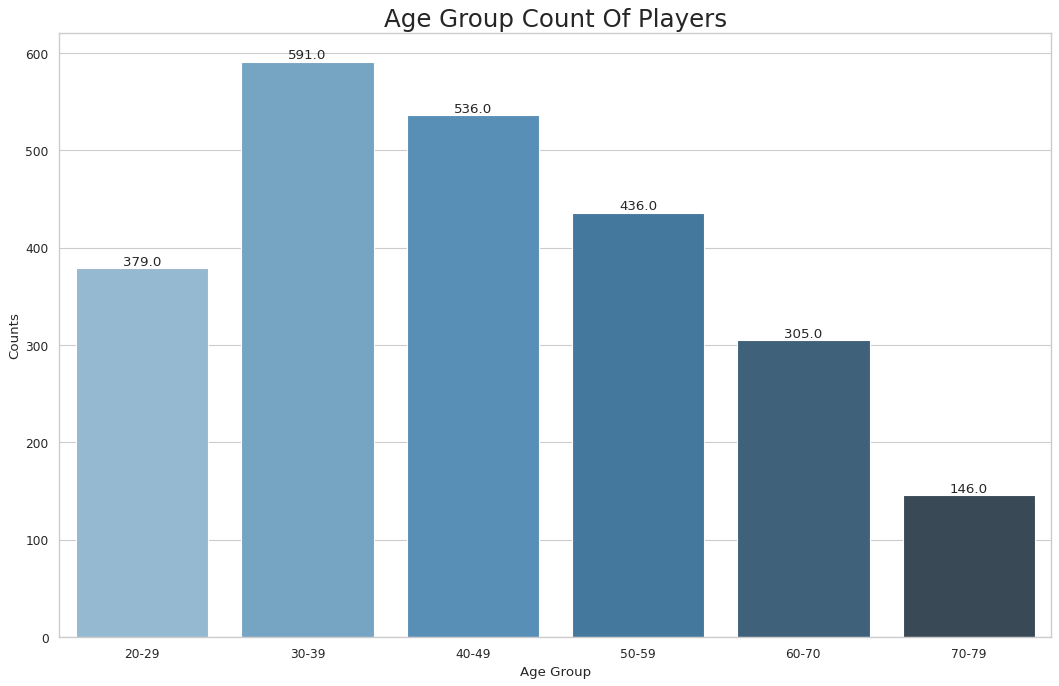

In [271]:

# users_with_age_df.toPandas().hist(column = "age", bins = 10)


import random

# Import Data
df_raw = users_with_age_df_grouped



# Prepare Data
df = users_with_age_df_grouped.toPandas()
n = users_with_age_df_grouped["age_group"].size+1


all_colors = list(plt.cm.colors.cnames.keys())
random.seed(100)
c = random.choices(all_colors, k=7)

# Plot Bars
plt.figure(figsize=(16,10), dpi= 80)
ax = sns.barplot(x="age_group", y="age_group_count", data=df,

                 palette="Blues_d")

for i, val in enumerate(df['age_group_count'].values):
    plt.text(i, val, float(val), horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

# Decoration
plt.gca().set_xticklabels(df['age_group'], rotation=60, horizontalalignment= 'right')
plt.title("Age Group Count Of Players", fontsize=22)
plt.ylabel('Counts')
plt.xlabel('Age Group')
plt.show()






AttributeError: ignored

In [25]:
users_with_age_df.groupBy("country").count().orderBy("count").show(6)

+-------+-----+
|country|count|
+-------+-----+
|     UA|    9|
|     SD|    9|
|     EE|    9|
|     MR|    9|
|     CM|    9|
|     AZ|    9|
+-------+-----+
only showing top 6 rows



AttributeError: ignored

In [130]:
!pip install scipy

In [143]:
df = team_buying_df_grouped.toPandas() 

df

,teamId,total_spending,total_strength
0,28,8.0,2.672721
1,95,89.0,7.717836
2,39,116.0,16.524637
3,32,141.0,7.471528
4,100,160.0,27.269889
5,69,169.0,3.339691
6,70,170.0,15.750538
7,78,176.0,23.110770
8,86,178.0,7.840508
9,2,178.0,4.252460


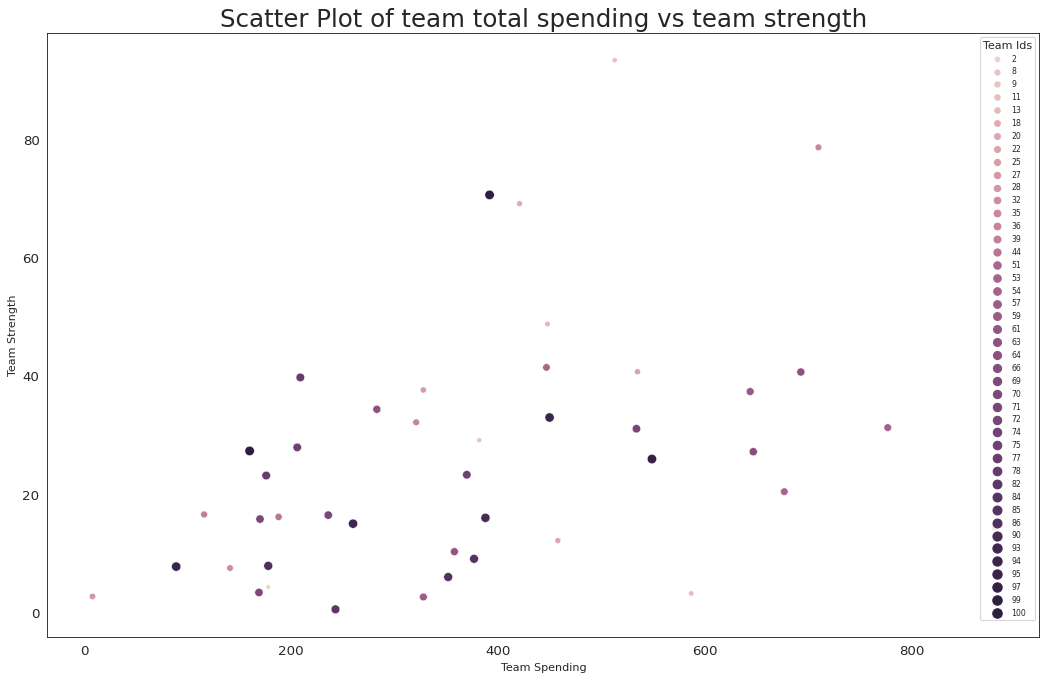

In [175]:
from matplotlib import patches
from scipy.spatial import ConvexHull
import numpy as np
import seaborn as sns
import warnings; warnings.simplefilter('ignore')
sns.set_style("white")

# Step 1: Prepare Data
df = team_buying_df_grouped.toPandas() 

# As many colors as there are unique midwest['category']
categories = np.unique(df['teamId'])
colors = [plt.cm.tab10(i/float(len(categories)-1)) for i in range(len(categories))]

# Step 2: Draw Scatterplot with unique color for each category
fig = plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')    


# Step 3: Draw Scatterplot
ax = sns.scatterplot(data=df, x="total_spending", y="total_strength", hue="teamId",size="teamId", legend="full")



# Step 3.1 : Set Legend
# plt.setp(ax.get_legend().get_texts(), fontsize='7') # for legend text
# plt.setp(ax.get_legend().get_title(), fontsize='7') # for legend title

# Step 4: Decorations

plt.xticks(fontsize=12); plt.yticks(fontsize=12)
plt.xlabel("Team Spending")
plt.ylabel("Team Strength")
plt.legend(title='Team Ids', fontsize=7)

plt.title("Scatter Plot of team total spending vs team strength", fontsize=22)

plt.show()    

In [28]:
!pip install pycountry_convert 

     |████████████████████████████████| 10.1 MB 6.9 MB/s 
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
    Preparing wheel metadata ... done
     |████████████████████████████████| 297 kB 59.1 MB/s 
     |████████████████████████████████| 207 kB 58.8 MB/s 
     |████████████████████████████████| 297 kB 49.2 MB/s 
     |████████████████████████████████| 297 kB 60.4 MB/s 
     |████████████████████████████████| 296 kB 60.9 MB/s 
     |████████████████████████████████| 296 kB 61.4 MB/s 
     |████████████████████████████████| 280 kB 60.2 MB/s 
     |████████████████████████████████| 280 kB 62.9 MB/s 
     |████████████████████████████████| 280 kB 58.2 MB/s 
     |████████████████████████████████| 280 kB 48.3 MB/s 
     |████████████████████████████████| 279 kB 60.8 MB/s 
     |████████████████████████████████| 279 kB 60.0 MB/s 
     |████████████████████████████████| 272 kB 61.3 MB/s 
     |████████████████████████████████| 272 kB 53.5 MB/s 
    

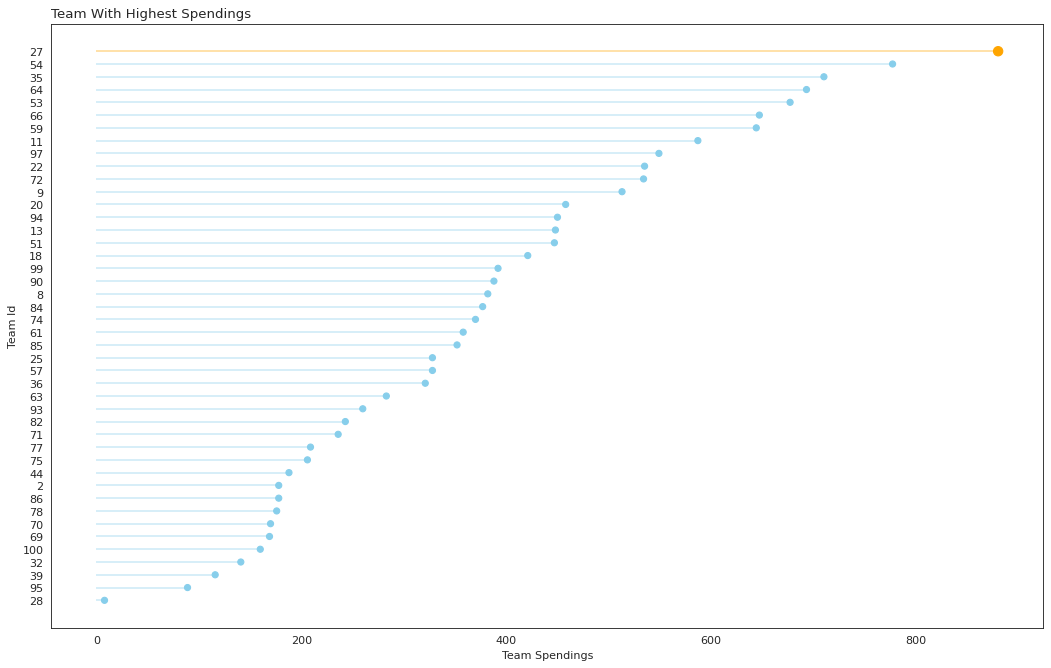

In [186]:
##############  TEAMS SPENDING LOLLIPOP GRAPH


# libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
 

# Step 1: Prepare Data
df = team_buying_df_grouped.toPandas() 
 
# Reorder it based on values:
ordered_df = df.sort_values(by='total_spending')
my_range=range(1,len(df.index)+1)

 # Create a color if the group is "B"
my_color=np.where(ordered_df['total_spending']==ordered_df['total_spending'].max(), 'orange', 'skyblue')
my_size=np.where(ordered_df['total_spending']==ordered_df['total_spending'].max() , 70, 30)


fig = plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')    

# The horizontal plot is made using the hline() function
plt.hlines(y=my_range, xmin=0, xmax=ordered_df['total_spending'], color=my_color, alpha=0.4)

plt.scatter(ordered_df['total_spending'], my_range, color=my_color, s=my_size, alpha=1)

# Add title and axis names
plt.yticks(my_range, ordered_df['teamId'])
plt.title("Team With Highest Spendings", loc='left')
plt.xlabel('Team Spendings')
plt.ylabel('Team Id')

# show the graph
plt.show()

In [29]:
############# TEAM SPENDING WITH AGE GROUP
team_user_buying_df = team_buying_df.alias("team_buying_df").join(users_df.alias("users_df"),\
                           f.col("team_buying_df.userId") == f.col("users_df.userId"),"inner")

In [30]:
import pycountry_convert as pc
from pyspark.sql.types import StringType



def country_to_continent(country_name):
  try:
    country_continent_code = pc.country_alpha2_to_continent_code(country_name)
    country_continent_name = pc.convert_continent_code_to_continent_name(country_continent_code)
    return country_continent_name
  except:
    return "None"





udf_country_to_continent = f.udf(country_to_continent , StringType())
team_user_buying_df = team_user_buying_df.withColumn("continent", udf_country_to_continent(f.col("country") ))



team_user_buying_df.show()

+------+-----------+-------------------+-------------------+---------------+------------+-------------------+----+-------------+----+------+-----+-----+-------------------+------+----------+----------+----------+-------+-------------+
|teamId|       name|   teamCreationTime|        teamEndTime|       strength|currentLevel|          timestamp|txId|userSessionId|team|userId|buyId|price|          timestamp|userId|      nick|   twitter|       dob|country|    continent|
+------+-----------+-------------------+-------------------+---------------+------------+-------------------+----+-------------+----+------+-----+-----+-------------------+------+----------+----------+----------+-------+-------------+
|     9|  pDG2bAh8T|2016-06-13 17:39:55|9999-12-31 23:59:59| 0.952175553216|           1|2016-05-26 15:36:54|6004|         5820|   9|  1300|    2|  3.0|2013-12-01 09:30:47|  1300|   2hh0NNM|  @RY1URF2|1998-05-06|     GR|       Europe|
|    35|b3PqpjmZ6TT|2016-06-14 02:08:07|9999-12-31 23:59:59|

In [85]:
from pyspark.sql import Window
from pyspark.sql.functions import rank,sum,col


window = Window.rowsBetween(Window.unboundedPreceding,Window.unboundedFollowing)

team_user_buying_df_stat = team_user_buying_df.groupby("continent").agg(f.sum('price').alias('spending_count'),
                                        f.mean('price').alias('price_avg'),
                                        f.min('price').alias('price_min'),
                                        f.max('price').alias('price_max')).\
   withColumn('total',sum(f.col('spending_count')).over(window)).\
   withColumn('Percent',f.col('spending_count')*100/f.col('total'))

team_user_buying_df_stat.show()

+-------------+--------------+------------------+---------+---------+-------+------------------+
|    continent|spending_count|         price_avg|price_min|price_max|  total|           Percent|
+-------------+--------------+------------------+---------+---------+-------+------------------+
|         None|         684.0|              11.4|      1.0|     20.0|16576.0| 4.126447876447877|
|       Europe|        2974.0| 7.548223350253807|      1.0|     20.0|16576.0|17.941602316602317|
|       Africa|        3889.0| 7.282771535580524|      1.0|     20.0|16576.0|23.461631274131275|
|North America|        2726.0| 7.593314763231198|      1.0|     20.0|16576.0|16.445463320463322|
|   Antarctica|          51.0|             2.125|      1.0|     10.0|16576.0|0.3076737451737452|
|South America|        1416.0|10.114285714285714|      1.0|     20.0|16576.0| 8.542471042471043|
|      Oceania|        1410.0| 5.802469135802469|      1.0|     20.0|16576.0|  8.50627413127413|
|         Asia|        3426.0|

In [32]:
!pip install squarify 


In [33]:
!pip install pywaffle

     |████████████████████████████████| 565 kB 1.6 MB/s 


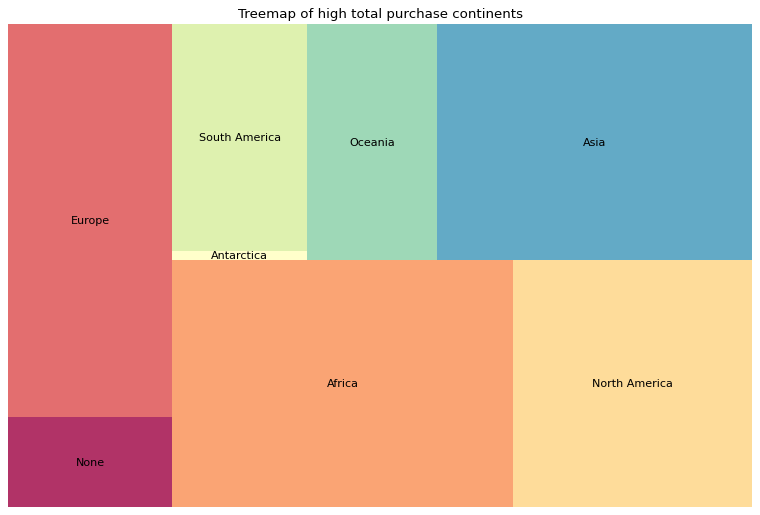

In [62]:
import matplotlib.pyplot as plt
import squarify    # pip install squarify (algorithm for treemap)
import pandas as pd


# Get dataframe continent & Percent columns as list
labels = list(team_user_buying_df_stat.toPandas()["continent"])
sizes =  list(team_user_buying_df_stat.toPandas()["Percent"])

# select colors
colors = [plt.cm.Spectral(i/float(len(labels))) for i in range(len(labels))]
# plot it
plt.figure(figsize=(12,8), dpi= 80)
squarify.plot(sizes=sizes, label=labels, color=colors ,alpha=.8 )
plt.title('Treemap of high total purchase continents')
plt.axis('off')
plt.show()

In [63]:
team_user_buying_df_stat.show()

+-------------+--------------+------------------+---------+---------+-------+------------------+
|    continent|spending_count|         price_avg|price_min|price_max|  total|           Percent|
+-------------+--------------+------------------+---------+---------+-------+------------------+
|         None|         684.0|              11.4|      1.0|     20.0|16576.0| 4.126447876447877|
|       Europe|        2974.0| 7.548223350253807|      1.0|     20.0|16576.0|17.941602316602317|
|       Africa|        3889.0| 7.282771535580524|      1.0|     20.0|16576.0|23.461631274131275|
|North America|        2726.0| 7.593314763231198|      1.0|     20.0|16576.0|16.445463320463322|
|   Antarctica|          51.0|             2.125|      1.0|     10.0|16576.0|0.3076737451737452|
|South America|        1416.0|10.114285714285714|      1.0|     20.0|16576.0| 8.542471042471043|
|      Oceania|        1410.0| 5.802469135802469|      1.0|     20.0|16576.0|  8.50627413127413|
|         Asia|        3426.0|

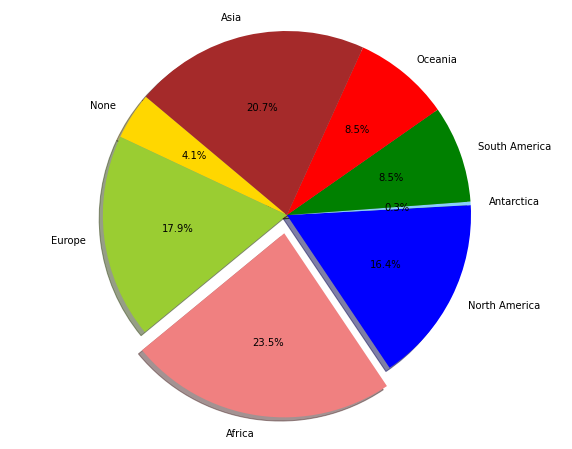

In [36]:
from re import X

######### PLOT PIE GRAPH OF HIGH SPENDING CONTINENTS
import matplotlib.pyplot as plt
import seaborn as sns


labels = list(team_user_buying_df_stat.toPandas()["continent"])
sizes =  list(team_user_buying_df_stat.toPandas()["Percent"])


colors = ['gold', 'yellowgreen', 'lightcoral','blue', 'lightskyblue','green','red', "brown"]
# explode = tuple( if X == 0 else x=0 for x in range(len(labels)) ) 

max = 0
for i in sizes:
  if max< i:
    max = i
  

explode = list(0 for _ in sizes)

explode[sizes.index(max)]  = 0.1

# 0, 0.1, 0, 0,0,0
# Plot
plt.figure(figsize=(10,8))
plt.pie(sizes,explode = explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)

plt.axis('equal')
plt.show()

In [40]:
!pip install pywaffle

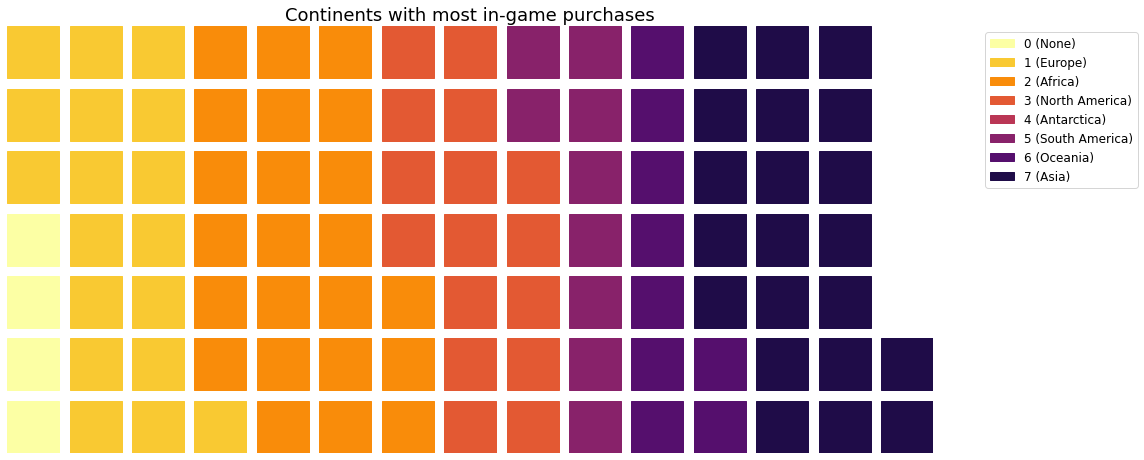

In [45]:
from pywaffle import Waffle
import matplotlib.pyplot as plt


labels = list(team_user_buying_df_stat.toPandas()["continent"])
sizes =  list(team_user_buying_df_stat.toPandas()["Percent"])

df = team_user_buying_df_stat.toPandas()
n_categories = df.shape[0]
colors = [plt.cm.inferno_r(i/float(n_categories)) for i in range(n_categories)]

# Draw Plot and Decorate
fig = plt.figure(
    FigureClass=Waffle,
    plots={
        '111': {
            'values': df['Percent'],
            'labels': ["{0} ({1})".format(n[0], n[1]) for n in df[['continent', 'Percent']].itertuples()],
            'legend': {'loc': 'upper left', 'bbox_to_anchor': (1.05, 1), 'fontsize': 12},
            'title': {'label': 'Continents with most in-game purchases', 'loc': 'center', 'fontsize':18}
        },
    },
    rows=7,
    colors=colors,
    figsize=(16, 9)
)

In [255]:
################### TEAM SPENDING AND TEAM RANK CORR



# team_user_buying_df.show()
team_user_buying_df.stat.corr("price","currentLevel")






nan

Text(0, 0.5, 'Total Spending')

<Figure size 1280x800 with 0 Axes>

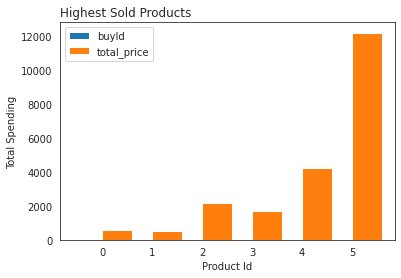

In [192]:
#################### AD CLICK CHECK 
###### CHECK WHICH ITEM SELLS WELL

from pyspark.sql.functions import rank,sum,col
# import matplotlib.pyplot as plt

adclicks_df = spark.read.csv("/content/flamingo-data/ad-clicks.csv", header=True, inferSchema=True)
buy_clicks_df = spark.read.csv("/content/flamingo-data/buy-clicks.csv", header=True, inferSchema=True)

item_purchases_stat_df = buy_clicks_df.groupby("buyId").agg(sum(f.col("price")).alias("total_price")).orderBy("buyId").toPandas()



item_purchase_stat_df = list(item_purchases_stat_df["buyId"])
plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k') 
item_purchases_stat_df.plot.bar(width=1.2)
plt.xticks(rotation=0)
plt.title("Highest Sold Products", loc='left')
plt.xlabel('Product Id')
plt.ylabel('Total Spending')
# buy_clicks_df.show()



<Figure size 1440x1440 with 0 Axes>

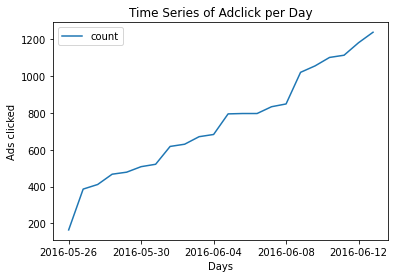

In [48]:
adclicks_df = spark.read.csv("/content/flamingo-data/ad-clicks.csv", header=True, inferSchema=True)

#######  FORMAT THE TIMESTAMP COLUMN IN DF AND THEN GROUP BY THE FORMATTED DF 
# To groupby newly created month column which holds  date in yyyy-MM-dd form. 
# count the occurance of each date. as each new date represents a click on ad.
plt.figure(figsize=(20,20))
# adclicks_df.groupby("adCategory").count().orderBy("count").show()
adclicks_df.withColumn("tstamp",f.date_format(adclicks_df.timestamp,'yyyy-MM-dd') )\
.withColumn("hstamp",f.date_format(adclicks_df.timestamp,'hh:mm:ss') )\
.withColumn("month",f.date_format(adclicks_df.timestamp,'yyyy-MM-dd') )\
.select("month")\
.groupBy("month")\
.count()\
.orderBy("count")\
.toPandas()\
.plot.line(x="month", y="count", xlabel="Days", ylabel="Ads clicked", title="Time Series of Adclick per Day")\


In [237]:

################# GET DEVICE TOTAL + PERCENTAGE + INDIVIDUAL PLATFORM

window = Window.rowsBetween(Window.unboundedPreceding,Window.unboundedFollowing)

user_session_df = spark.read.csv("/content/flamingo-data/user-session.csv", header=True, inferSchema=True)
platform_usage_stats_df = user_session_df.groupBy("platformType").agg(f.mean("teamLevel").alias("average_rank"), 
                                            f.count("platformType").alias("total_platform_count"))\
                                            .orderBy("average_rank")\
                                            .withColumn('total',sum(f.col('total_platform_count')).over(window))\
                                            .withColumn('Percent',f.col('total_platform_count')*100/f.col('total'))\
                                            .orderBy(f.col("Percent").desc())



# team_user_buying_df_stat = team_user_buying_df.groupby("continent").agg(f.sum('price').alias('spending_count'),
#                                         f.mean('price').alias('price_avg'),
#                                         f.min('price').alias('price_min'),
#                                         f.max('price').alias('price_max')).\
#    withColumn('total',sum(f.col('spending_count')).over(window)).\
#    withColumn('Percent',f.col('spending_count')*100/f.col('total'))
# platform_usage_stats_df = platform_usage_stats_df.count().withColumn("total_platform_count", f.col("count"))
platform_usage_stats_df.show()

+------------+-----------------+--------------------+-----+------------------+
|platformType|     average_rank|total_platform_count|total|           Percent|
+------------+-----------------+--------------------+-----+------------------+
|      iphone|4.349509550851833|                3874| 9250| 41.88108108108108|
|     android|4.388515577275504|                3274| 9250|35.394594594594594|
|     windows|4.364516129032258|                1240| 9250|13.405405405405405|
|       linux|4.182539682539683|                 504| 9250| 5.448648648648649|
|         mac|4.379888268156424|                 358| 9250|3.8702702702702703|
+------------+-----------------+--------------------+-----+------------------+



1.9
1.5999999999999999
1.2999999999999998
0.9999999999999998
0.6999999999999997


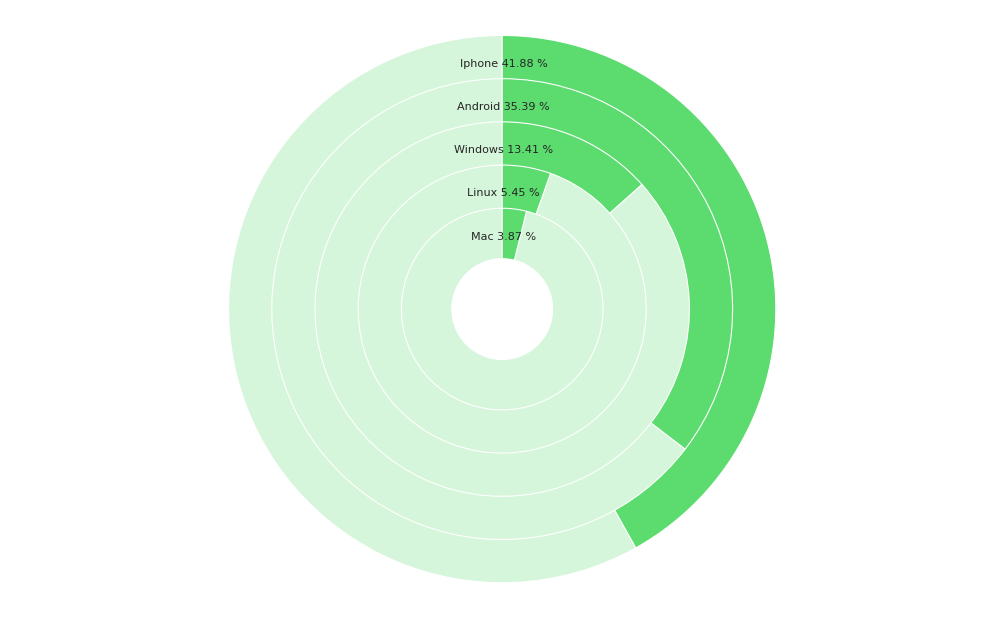

In [238]:
#################### DONUT PLOT
platform_usage_stats_df




import pandas as pd
import re


user_session_df = spark.read.csv("/content/flamingo-data/user-session.csv", header=True, inferSchema=True)
# platform_usage_stats_df = user_session_df.groupBy("platformType").agg(f.mean("teamLevel").alias("average_rank"), 
#                                             f.count("platformType").alias("total_platform_count")).orderBy("average_rank")


# xlabels = list(platform_usage_stats_df.toPandas()["platformType"])
# # platform_usage_stats_df.toPandas().plot.bar()

# labels = list(platform_usage_stats_df.toPandas()["platformType"])
# sizes =  list(platform_usage_stats_df.toPandas()["total_platform_count"])

data = platform_usage_stats_df.toPandas()


import matplotlib.pyplot as plt


fig = plt.figure(figsize=(16, 10), dpi= 80, facecolor='w', edgecolor='k')

# create donut plots
startingRadius = 0.7 + (0.3* (len(data)-1))
for index, row in data.iterrows():
    scenario = row["platformType"]
    percentage = row["Percent"]
    textLabel = scenario.capitalize() + ' ' + str(round(percentage,2)) + " %"
    print(startingRadius)
    #percentage = int(re.search(r'\d+', percentage).group())
    remainingPie = 100 - percentage

    donut_sizes = [remainingPie, percentage]

    plt.text(0.01, startingRadius - 0.197, textLabel, horizontalalignment='center', verticalalignment='center')
    plt.pie(donut_sizes, radius=startingRadius, startangle=90, colors=['#d5f6da', '#5cdb6f'],
            wedgeprops={"edgecolor": "white", 'linewidth': 1})

    startingRadius-=0.3



# equal ensures pie chart is drawn as a circle (equal aspect ratio)
plt.axis('equal')

# create circle and place onto pie chart
circle = plt.Circle(xy=(0, 0), radius=0.35, facecolor='white')
plt.gca().add_artist(circle)
plt.show()

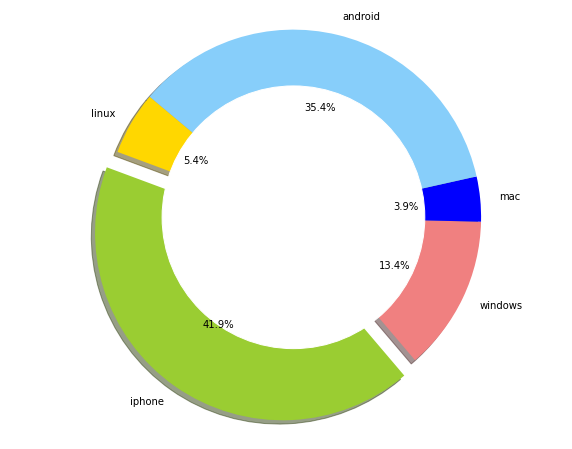

In [52]:
############## GET DEVICE PIE CHART


import matplotlib.pyplot as plt
import seaborn as sns




user_session_df = spark.read.csv("/content/flamingo-data/user-session.csv", header=True, inferSchema=True)
platform_usage_stats_df = user_session_df.groupBy("platformType").agg(f.mean("teamLevel").alias("average_rank"), 
                                            f.count("platformType").alias("total_platform_count")).orderBy("average_rank")


xlabels = list(platform_usage_stats_df.toPandas()["platformType"])
# platform_usage_stats_df.toPandas().plot.bar()

labels = list(platform_usage_stats_df.toPandas()["platformType"])
sizes =  list(platform_usage_stats_df.toPandas()["total_platform_count"])


colors = ['gold', 'yellowgreen', 'lightcoral','blue', 'lightskyblue','green','red', "brown"]
# explode = tuple( if X == 0 else x=0 for x in range(len(labels)) ) 

max = 0
for i in sizes:
  if max< i:
    max = i
  

explode = list(0 for _ in sizes)

explode[sizes.index(max)]  = 0.1

# 0, 0.1, 0, 0,0,0
# Plot
plt.figure(figsize=(10,8))
plt.pie(sizes,explode = explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=140)


# Create a circle for the center of the plot
my_circle=plt.Circle( (0,0), 0.7, color="white")
p=plt.gcf()
p.gca().add_artist(my_circle)

plt.axis('equal')




plt.show()





[Text(0, 0.5, 'count'),
 Text(0.5, 0, 'Count of time person joins a team'),
 Text(0.5, 1.0, 'Plot showing statistics of players joining teams')]

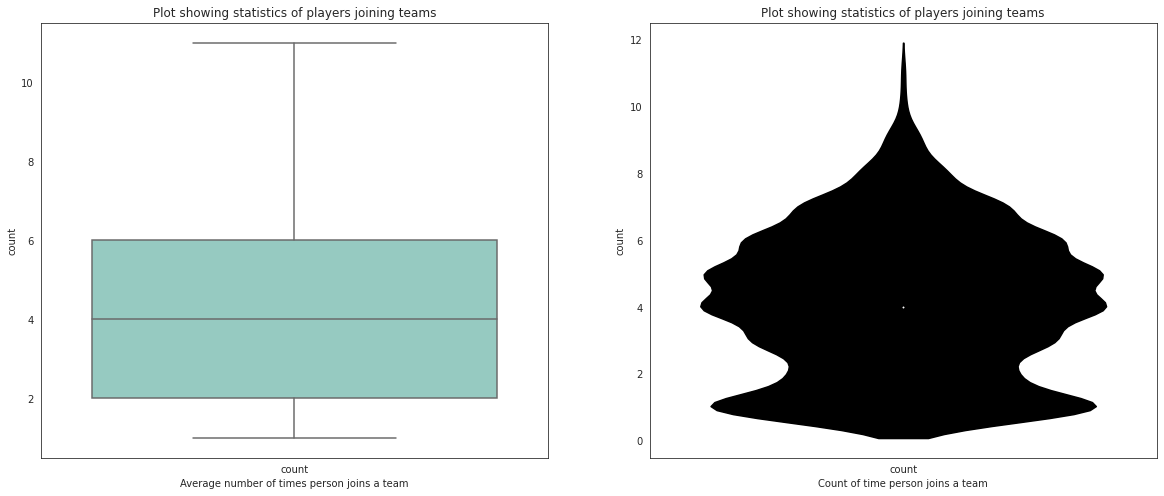

In [239]:
######################### CHECKING ON AVERAGE A PLAYER JOINS HOW MANY TEAMS
team_assigments = spark.read.csv("/content/flamingo-data/team-assignments.csv", header=True, inferSchema=True)


team_assigment_stats_df = team_assigments.groupBy("userId").agg(f.count("userId").alias("count")).select("count","userId").orderBy("count")
x = team_assigment_stats_df.select("count").toPandas()

fig = plt.figure(figsize=(20, 8))
ax = fig.add_subplot(1, 2, 1)
ax = sns.boxplot(data=x, palette="Set3")
ax.set(xlabel='Average number of times person joins a team', ylabel='count', 
       title = "Plot showing statistics of players joining teams")



ax = fig.add_subplot(1, 2, 2)
ax = sns.violinplot(data=x, color = 'black')
ax.set(xlabel='Count of time person joins a team', ylabel='count', title = "Plot showing statistics of players joining teams")





+------------+------------------+----------+-------------------+
|platformType|platform_hit_count|total_hits|         percentage|
+------------+------------------+----------+-------------------+
|         mac|             30582|    276852|0.11046335226041351|
|       linux|             53910|    498808| 0.1080776571346089|
|     windows|            113098|   1042214|0.10851706079557558|
|     android|            299576|   2747372|0.10904093075127795|
|      iphone|            348976|   3066988|0.11378459909200818|
+------------+------------------+----------+-------------------+



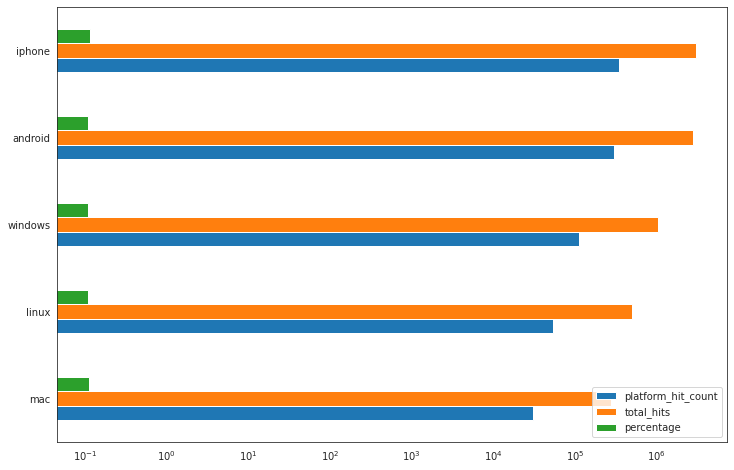

In [244]:
######################## CHECKING HIGHER RANK TEAMS PLAY WHICH EVENTS
######################### GAME CLICKS IS PLATFORM DEPENDANT

game_clicks_df = spark.read.csv("/content/flamingo-data/game-clicks.csv", header=True, inferSchema=True)
user_session_df = spark.read.csv("/content/flamingo-data/user-session.csv", header=True, inferSchema=True)



game_clicks_user_session_df = game_clicks_df.alias("game_clicks_df").join(user_session_df.alias("user_session_df"), 
                                            f.col("game_clicks_df.userid") == f.col("user_session_df.userId"), "inner")\
                                            


# https://stackoverflow.com/questions/49021972/pyspark-count-rows-on-condition




game_clicks_user_session_pf_df = game_clicks_user_session_df.groupby("platformType")\
                  .agg( f.sum( f.when(f.col("isHit") == 1, 1).otherwise(0)).alias("platform_hit_count") , 
                  f.count("isHit").alias("total_hits"))\
                  .withColumn("percentage", f.col("platform_hit_count") / f.col("total_hits"))\
                  .orderBy("platform_hit_count")
                  
ylabels = list(game_clicks_user_session_pf_df.toPandas()["platformType"]  )    
                  


game_clicks_user_session_pf_df.toPandas().plot(
                   kind='barh',
                  figsize=(12,8),
                  logx=True).set_yticklabels(ylabels)

# game_clicks_user_session_df.groupby("platformType").agg( f.count("isHit") )
# game_clicks_user_session_pf_df.show()

# game_clicks_user_session_pf_df_percentage = game_clicks_user_session_pf_df\
                                            # .withColumn("percentage",f.col("platform_hit_count").divide(f.col("total_hits")))


# game_clicks_user_session_pf_df_percentage

game_clicks_user_session_pf_df.show()




  platformType  platform_hit_count  total_hits  percentage
0          mac               30582      276852    0.110463
1        linux               53910      498808    0.108078
2      windows              113098     1042214    0.108517
3      android              299576     2747372    0.109041
4       iphone              348976     3066988    0.113785


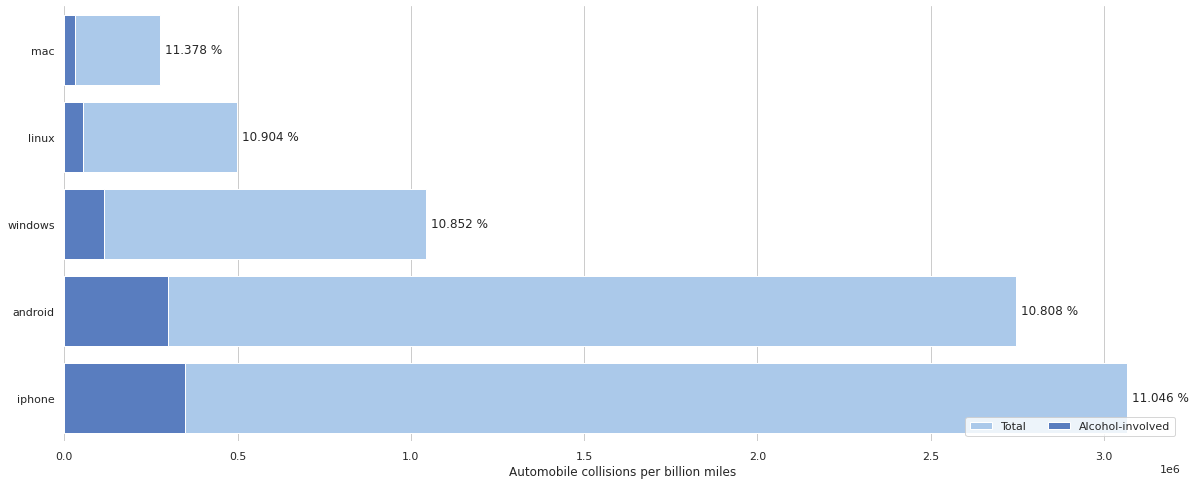

In [292]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")

# Initialize the matplotlib figure
f, ax = plt.subplots(figsize=(20, 8))

# Load the example car crash dataset
crashes = game_clicks_user_session_pf_df.toPandas()

print(crashes.head())

# Plot the total crashes
sns.set_color_codes("pastel")
sns.barplot(x="total_hits", y="platformType", data=crashes,
            label="Total", color="b")


for bar, percentage in zip(ax.patches, crashes['percentage'].values[::-1]):
    ax.annotate( str(round(float(percentage),5) * 100 ) + " %" ,xy=(bar.get_width(), bar.get_y()+bar.get_height()/2),
            xytext=(5, 0), textcoords='offset points', ha="left", va="center")

# for bar, percentage in zip(ax.patches, crashes['percentage'].values[::-1]):
#     ax.text(0.8, bar.get_y()+bar.get_height()/2, percentage, color = 'white', ha = 'left', va = 'center')

# for i, val in enumerate(crashes['percentage'].values):
#     ax.text(val, i, str(round(float(val),4) * 100 ) + " %", horizontalalignment='center', verticalalignment='bottom', fontdict={'fontweight':500, 'size':12})

# Plot the crashes where alcohol was involved
sns.set_color_codes("muted")
sns.barplot(x="platform_hit_count", y="platformType", data=crashes,
            label="Alcohol-involved", color="b")


# Add a legend and informative axis label

ax.legend(ncol=2, loc="lower right", frameon=True)
ax.set(ylabel="",
       xlabel="Automobile collisions per billion miles")
sns.despine(left=True, bottom=True)

In [264]:
############# CORR
from pyspark.sql import functions as f

team_df = spark.read.csv("/content/flamingo-data/team.csv", header=True, inferSchema=True)
buyclicks_df = spark.read.csv("/content/flamingo-data/buy-clicks.csv", header=True, inferSchema=True)


team_buying_df = team_df.alias("teamdf").join(buyclicks_df.alias("buyclicks"),\
                            f.col("teamdf.teamId") == f.col("buyclicks.team"),"inner")



########## HISTOGRAM OF SPENDING COUNT HOW MUCH SPENDING IS DISTRIBUTED && CORRELATION

# team_buying_df.groupBy("teamId").sum("price", "strength").orderBy("sum(price)").toPandas().hist(column = "sum(price)")


team_buying_df_grouped = team_buying_df.groupBy("teamId").sum("price", "strength")\
         .select('teamId', f.col('sum(price)').alias('total_spending'), f.col('sum(strength)').alias('total_strength'))\
         .orderBy("sum(price)")

team_buying_df.stat.corr("price","strength")
# team_buying_df_grouped.show()

-0.06938790495270436

In [55]:
################ CLUSTERING ANALYSIS

# Utility functions for Spark Cluster Analysis Hands-On
#
#
from itertools import cycle, islice
from math import sqrt
from numpy import array
from pandas.plotting import parallel_coordinates
from pyspark.ml.clustering import KMeans as KM
from pyspark.mllib.linalg import DenseVector
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def computeCost(featuresAndPrediction, model):
    allClusterCenters = [DenseVector(c) for c in model.clusterCenters()]
    arrayCollection   = featuresAndPrediction.rdd.map(array)

    def error(point, predictedCluster):
        center = allClusterCenters[predictedCluster]
        z      = point - center
        return sqrt((z*z).sum())
    
    return arrayCollection.map(lambda row: error(row[0], row[1])).reduce(lambda x, y: x + y)


def elbow(elbowset, clusters):
	wsseList = []	
	for k in clusters:
		print("Training for cluster size {} ".format(k))
		kmeans = KM(k = k, seed = 1)
		model = kmeans.fit(elbowset)
		transformed = model.transform(elbowset)
		featuresAndPrediction = transformed.select("features", "prediction")

		W = computeCost(featuresAndPrediction, model)
		print("......................WSSE = {} ".format(W))

		wsseList.append(W)
	return wsseList

def elbow_plot(wsseList, clusters):
	wsseDF = pd.DataFrame({'WSSE' : wsseList, 'k' : clusters })
	wsseDF.plot(y='WSSE', x='k', figsize=(15,10), grid=True, marker='o')

def pd_centers(featuresUsed, centers):
	colNames = list(featuresUsed)
	colNames.append('prediction')

	# Zip with a column called 'prediction' (index)
	Z = [np.append(A, index) for index, A in enumerate(centers)]

	# Convert to pandas for plotting
	P = pd.DataFrame(Z, columns=colNames)
	P['prediction'] = P['prediction'].astype(int)
	return P

def parallel_plot(data, P):
	my_colors = list(islice(cycle(['b', 'r', 'g', 'y', 'k']), None, len(P)))
	plt.figure(figsize=(15,8)).gca().axes.set_ylim([-3,+3])
	parallel_coordinates(data, 'prediction', color = my_colors, marker='o')



In [56]:
df = spark.read.csv("/content/combined-data.csv", header=True, inferSchema=True)

df

DataFrame[userId: int, userSessionId: int, teamLevel: int, platformType: string, count_gameclicks: int, count_hits: int, count_buyId: string, avg_price: string]

In [57]:
df.count()
df.na.drop().count()





4619

In [58]:
df.columns

['userId',
 'userSessionId',
 'teamLevel',
 'platformType',
 'count_gameclicks',
 'count_hits',
 'count_buyId',
 'avg_price']

In [59]:
################ K-MEANS CLUSTERING
ad_click_df = spark.read.csv("/content/flamingo-data/ad-clicks.csv", header=True, inferSchema=True)
buy_click_df = spark.read.csv("/content/flamingo-data/buy-clicks.csv", header=True, inferSchema=True)
game_click_df = spark.read.csv("/content/flamingo-data/game-clicks.csv", header=True, inferSchema=True)
level_events_df = spark.read.csv("/content/flamingo-data/level-events.csv", header=True, inferSchema=True)
team_assignments_df = spark.read.csv("/content/flamingo-data/team-assignments.csv", header=True, inferSchema=True)
team_df = spark.read.csv("/content/flamingo-data/team.csv", header=True, inferSchema=True)
users_df = spark.read.csv("/content/flamingo-data/users.csv", header=True, inferSchema=True)
users_session_df = spark.read.csv("/content/flamingo-data/user-session.csv", header=True, inferSchema=True)












In [240]:
################# JOIN ALL TABLES

whole_dataset_df = team_assignments_df.alias("team_assignment_df").join(users_df.alias("users_df"),\
                           f.col("team_assignment_df.userId") == f.col("users_df.userId"),"inner")\
                           .join(team_df.alias("team_df"), f.col("team_df.teamId") == f.col("team"))\
                           .join(users_session_df.alias("users_session_df"), f.col("users_session_df.userId") == f.col("users_df.userId"))\
                           .join(game_click_df.alias("game_click_df"), f.col("game_click_df.userId") == f.col("users_df.userId"))\
                           .join(ad_click_df.alias("ad_click_df"), f.col("ad_click_df.userId") == f.col("users_df.userId"))\
                           .join(buy_click_df.alias("buy_click_df"), f.col("buy_click_df.userId") == f.col("users_df.userId"))\
                           .select("team_assignment_df.timestamp", "team_assignment_df.timestamp", 
                                   "users_df.userId", "users_df.nick", "users_df.twitter","users_df.country","users_df.dob",
                                   "team_df.teamId","team_df.teamCreationTime", "team_df.teamEndTime", "team_df.strength","team_df.currentLevel",
                                   "users_session_df.timestamp","users_session_df.timestamp", "users_session_df.sessionType","users_session_df.teamLevel","users_session_df.platformType",
                                   "game_click_df.timestamp", "game_click_df.isHit",
                                   "ad_click_df.adId", "ad_click_df.adCategory",
                                   "buy_click_df.txId","buy_click_df.price")\
                          

In [242]:
whole_dataset_df = whole_dataset_df.select('strength',
 'teamLevel',
 'isHit',
 'price').distinct()

whole_dataset_df.count()


whole_dataset_df.show()


+---------------+---------+-----+-----+
|       strength|teamLevel|isHit|price|
+---------------+---------+-----+-----+
|  0.34348462196|        3|    1|  2.0|
| 0.141376627543|        6|    1|  3.0|
|  0.13358763615|        5|    1|  2.0|
| 0.350676528613|        3|    0|  3.0|
| 0.393763462002|        3|    0|  5.0|
| 0.642122051019|        4|    0| 10.0|
| 0.767191204445|        3|    0|  1.0|
|0.0859900712952|        7|    1| 20.0|
| 0.132214897776|        1|    0|  3.0|
|   0.6086527331|        6|    1| 20.0|
|  0.47269158141|        2|    0|  1.0|
| 0.718462485619|        7|    1|  2.0|
| 0.132214897776|        5|    1| 20.0|
|   0.6086527331|        4|    0|  3.0|
|   0.6086527331|        4|    0|  2.0|
|   0.6086527331|        1|    0|  1.0|
| 0.276723269022|        4|    1| 20.0|
| 0.668180373589|        1|    0|  2.0|
| 0.701621474289|        3|    1| 20.0|
|0.0495931577569|        5|    0| 10.0|
+---------------+---------+-----+-----+
only showing top 20 rows



In [243]:
############# CLASSIFICATION AND CLUSTERING ANALYSIS

combined_data_df = spark.read.csv("/content/combined-data.csv", header=True, inferSchema=True)


combined_data_df.show()





+------+-------------+---------+------------+----------------+----------+-----------+---------+
|userId|userSessionId|teamLevel|platformType|count_gameclicks|count_hits|count_buyId|avg_price|
+------+-------------+---------+------------+----------------+----------+-----------+---------+
|   812|         5648|        1|     android|              69|         8|       NULL|     NULL|
|  1658|         5649|        1|      iphone|              31|         5|       NULL|     NULL|
|  1589|         5650|        1|      iphone|              26|         2|       NULL|     NULL|
|  1863|         5651|        1|     android|              35|         4|       NULL|     NULL|
|   937|         5652|        1|     android|              39|         0|          1|     1.00|
|   342|         5653|        1|     android|              36|         5|       NULL|     NULL|
|   849|         5654|        1|      iphone|              40|         5|       NULL|     NULL|
|  1277|         5655|        1|     win

In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.feature import VectorAssembler
from pyspark.ml.feature import StandardScaler
featuresUsed = ['strength',
 'teamLevel',
 'isHit',
 'price']
assembler = VectorAssembler(inputCols=featuresUsed, outputCol="features_unscaled")
assembled = assembler.transform(whole_dataset_df)

assembled.show()
assembled.count()

In [ ]:


scaler = StandardScaler(inputCol="features_unscaled", outputCol="features", withStd=True, withMean=True)
scalerModel = scaler.fit(assembled)
scaledData = scalerModel.transform(assembled)



In [ ]:
from pyspark.ml.clustering import KMeans
from pyspark.ml.evaluation import ClusteringEvaluator
silhouette_score=[]
evaluator = ClusteringEvaluator(predictionCol='prediction', featuresCol='features', \
                                metricName='silhouette', distanceMeasure='squaredEuclidean')
for i in range(2,10):
    KMeans_algo=KMeans(featuresCol='features', k=i)
    KMeans_fit=KMeans_algo.fit(scaledData)
    output=KMeans_fit.transform(scaledData)
    score=evaluator.evaluate(output)
    silhouette_score.append(score)
    print("Silhouette Score:",score)

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(1,1, figsize =(8,6))
ax.plot(range(2,10),silhouette_score)
ax.set_xlabel('k')
ax.set_ylabel('cost')

In [ ]:
clusters = range(2,31)

wsseList = elbow(elbowset, clusters)

In [ ]:
elbow_plot(wsseList, clusters)

In [ ]:
scaledDataFeat = scaledData.select("features")
scaledDataFeat.persist()

In [ ]:
kmeans = KMeans(k=12, seed=1)
model = kmeans.fit(scaledDataFeat)
transformed = model.transform(scaledDataFeat)

In [ ]:
centers = model.clusterCenters()
centers

In [ ]:
# Dry Days
parallel_plot(P[P['relative_humidity'] < -0.5], P)

In [ ]:
####### TIME SERIES PEAK AND TROUF
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt



adclicks_df = spark.read.csv("/content/flamingo-data/ad-clicks.csv", header=True, inferSchema=True)

df = adclicks_df.withColumn("tstamp",f.date_format(adclicks_df.timestamp,'yyyy-MM-dd') )\
.withColumn("hstamp",f.date_format(adclicks_df.timestamp,'hh:mm:ss') )\
.withColumn("month",f.date_format(adclicks_df.timestamp,'yyyy-MM-dd') )\
.select("month")\
.groupBy("month")\
.count()\
.orderBy("count")\
.toPandas()\


# Get the Peaks and Troughs
data = df['count'].values
doublediff = np.diff(np.sign(np.diff(data)))
print(doublediff)
peak_locations = np.where(doublediff == -2)[0] + 1

doublediff2 = np.diff(np.sign(np.diff(-1*data)))
trough_locations = np.where(doublediff2 == -2)[0] + 1



# Draw Plot
plt.figure(figsize=(16,10), dpi= 80)
plt.plot('month', 'count', data=df, color='tab:blue', label='Air Traffic')
plt.scatter(df.month[peak_locations], df.count[peak_locations], marker=mpl.markers.CARETUPBASE, color='tab:green', s=100, label='Peaks')
plt.scatter(df.month[trough_locations], df.count[trough_locations], marker=mpl.markers.CARETDOWNBASE, color='tab:red', s=100, label='Troughs')




# Annotate
for t, p in zip(trough_locations[1::5], peak_locations[::3]):
    plt.text(df.month[p], df.count[p]+15, df.month[p], horizontalalignment='center', color='darkgreen')
    plt.text(df.month[t], df.count[t]-35, df.month[t], horizontalalignment='center', color='darkred')

# Decoration
plt.ylim(50,750)
xtick_location = df.index.tolist()[::6]
xtick_labels = df.month.tolist()[::6]
plt.xticks(ticks=xtick_location, labels=xtick_labels, rotation=90, fontsize=12, alpha=.7)
plt.title("Peak and Troughs of Air Passengers Traffic (1949 - 1969)", fontsize=22)
plt.yticks(fontsize=12, alpha=.7)

# Lighten borders
plt.gca().spines["top"].set_alpha(.0)
plt.gca().spines["bottom"].set_alpha(.3)
plt.gca().spines["right"].set_alpha(.0)
plt.gca().spines["left"].set_alpha(.3)

plt.legend(loc='upper left')
plt.grid(axis='y', alpha=.3)
plt.show()
